# SOM (Self-Organizing Map) - Manual - Iris DataSet

### Aprendizagem não supervisionada 
### Clusterização

## Importação das bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
base = pd.read_csv('../bases/iris.csv')
entradas = base.iloc[:, 0:len(base.columns) -1].values 
classes = base.iloc[:,len(base.columns)-1].values
NumColunas = len(base.columns) - 1
entradas = np.asarray(entradas,dtype=np.float32)
base.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Pré-processamento dos Dados de Entrada

### Padronização dos dados

In [3]:
def Padronizacao(entradas):
    for i in range (len(base.columns)-1):
        entradas[:,i] = (entradas[:,i] - np.median(entradas[:,i]))/entradas[:,i].std(axis = 0)
    return entradas

### Normalização dos dados

In [4]:
def Normalizacao(entradas):
    for i in range (len(base.columns)-1):
        entradas[:,i] = (entradas[:,i] - np.min(entradas[:,i]))/(np.max(entradas[:,i]) - np.min(entradas[:,i]))
    return entradas

### Transformação das classes para o tipo numérico

In [5]:
labelEncoder = LabelEncoder()
classesN = labelEncoder.fit_transform(classes)
print(classesN)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Plotagem dos dados (colunas 1 e 2)

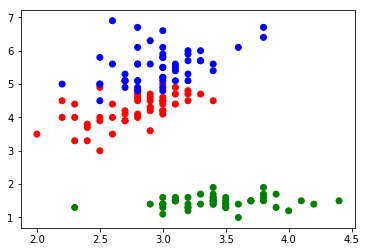

In [6]:
x = base.iloc[:,1].values
y = base.iloc[:,2].values

color= ['red' if l == 1 else 'blue' if l == 2 else 'green' for l in classesN]
plt.scatter(x, y, color=color)

## Entradas do usuário e demais atributos

In [7]:
epocas = int(input('\033[1m' + "Digite a quantidade de épocas: "))
TaxaAprendIni = float(input('\033[1m' + "Digite a taxa de aprendizado: "))
linhas = int(input('\033[1m' + "Digite a quantidade de linhas da rede SOM: "))
colunas = int(input('\033[1m' + "Digite a quantidade de colunas da rede SOM: "))

print("Digite:")
print("1: Normalização dos dados ")
print("2: Padronização dos dados ")
PadNorm = int(input(""))
if (PadNorm == 1):
    entradas = Padronizacao(entradas)
else:
    entradas = Normalizacao(entradas)

dimensoes = NumColunas
pesos = np.random.uniform(size = (linhas, colunas, dimensoes))
pesosAnt = np.zeros((linhas, colunas, dimensoes))
raioIni = max(colunas, linhas) / 2

Digite a quantidade de épocas: 100
Digite a taxa de aprendizado: 0.5
Digite a quantidade de linhas da rede SOM: 5
Digite a quantidade de colunas da rede SOM: 5
Digite:
1: Normalização dos dados 
2: Padronização dos dados 
2


In [8]:
coordenadas = np.zeros([linhas,colunas,2],dtype=np.int32)
for i in range(0, linhas):
    for j in range(0, colunas):
        coordenadas[i][j] = [i,j]

In [9]:
raio = raioIni
TaxaAprend = TaxaAprendIni
max_iterations = len(entradas)+1
too_many_iterations = 10 * max_iterations
convergencia = [1]
timestep = 1
e = 0.001 
flag = 0
epoca = 0

### Treinamento

In [10]:
while epoca < epocas:
    shuffle = np.random.randint(len(entradas), size=len(entradas))
    for i in range(len(entradas)):   
        # Distância euclidiana
        J = np.linalg.norm(pesos - pesosAnt)
        # Condição para convergência
        if  J <= e: 
            flag = 1
            break            
        else:            
            entrada = entradas[shuffle[i]]
            entrada_ary = np.tile(entrada, (linhas, colunas, 1))
            Distancias = np.linalg.norm(entrada_ary - pesos, axis=2)
            
            # Rede WTA (Winner Take All)            
            # Obtem o neurônio vencedor, ou seja, o que tem menor distância
            BMU = np.unravel_index(np.argmin(Distancias, axis=None), Distancias.shape)            
            pesosAnt = np.copy(pesos)             
            for i in range(linhas):
                for j in range(colunas):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= raio:
                        # Atualização do vetor de pesos
                        pesos[i][j] = pesos[i][j] + TaxaAprend*(entrada-pesos[i][j])
                        
            TaxaAprend = TaxaAprendIni * (1- (epoca/ epocas)) # WTA - Winner Take All
            raio = raioIni * math.exp(-epoca/epocas)
            timestep+=1
            
    if J < min(convergencia):
        pesos_finais = pesos
    convergencia.append(J)
    
    if flag==1:
        break
    epoca+=1

### Plotagem da taxa de erro x época

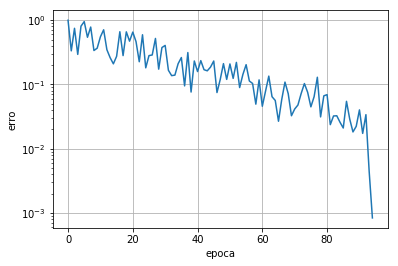

Erro final: 0.0008350166133345916


In [11]:
plt.plot(convergencia)
plt.ylabel('erro')
plt.xlabel('epoca')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Erro final: ' + str(J))

### Plotagem da Rede SOM

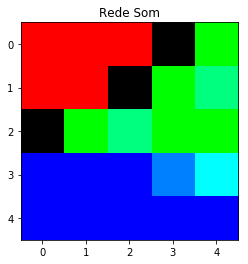

In [13]:
BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([linhas,colunas,3],dtype=np.float32)

i=0
for entrada in entradas:    
    entrada_ary = np.tile(entrada, (linhas, colunas, 1))
    Distancias = np.linalg.norm(entrada_ary - pesos_finais, axis=2)

    # Obtem o neurônio vencedor, ou seja, o que tem menor distância
    BMU = np.unravel_index(np.argmin(Distancias, axis=None), Distancias.shape)
    
    x = BMU[0]
    y = BMU[1]
    
    if classesN[i] == 0:
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classesN[i] == 1:
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classesN[i] == 2:
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)
plt.title("Rede Som")
plt.imshow(result_map, interpolation='nearest')

## KNN - em construção